In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , confusion_matrix
import zipfile

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
destination_folder = '/content/drive/MyDrive/titanic1'
myZipFile='/content/drive/MyDrive/titanic.zip'
with zipfile.ZipFile(myZipFile, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

In [11]:
data=pd.read_csv('/content/drive/MyDrive/titanic1/train.csv')

Data Exploration

In [12]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data.shape

(891, 12)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data Preprocessing

In [85]:
data_copy = data.copy()

In [86]:
data_copy.drop('Cabin',axis=1,inplace=True)

In [87]:
data_copy['Age'].fillna(data_copy['Age'].mean(),inplace=True)

/tmp/ipython-input-1065242490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy['Age'].fillna(data_copy['Age'].mean(),inplace=True)


In [88]:
data_copy.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [89]:
data_copy['Embarked'].mode()

,Embarked
0,S


In [90]:
data_copy['Embarked'].fillna(data_copy['Embarked'].mode()[0],inplace=True)

/tmp/ipython-input-4035327235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy['Embarked'].fillna(data_copy['Embarked'].mode()[0],inplace=True)


In [91]:
data_copy.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Data Analysis

In [84]:
data_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [95]:
# finding the number of people survived and not survived
data_copy['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [97]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

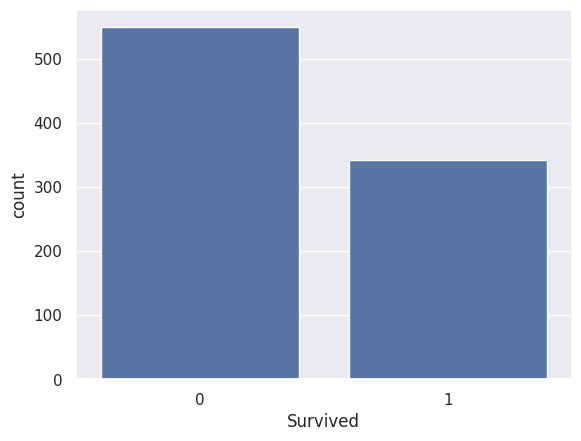

In [101]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=data_copy)

In [102]:
data_copy['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

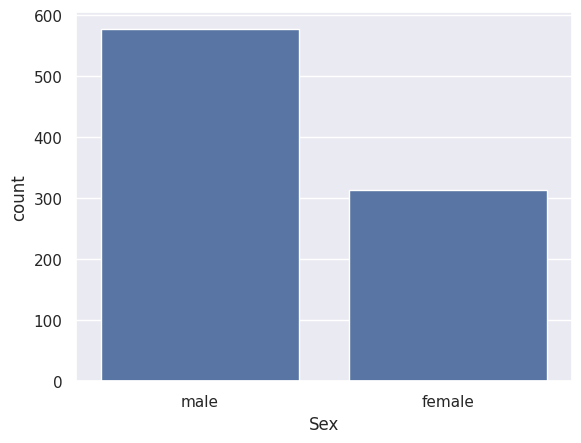

In [103]:
sns.countplot(x='Sex', data=data_copy)

<Axes: xlabel='Sex', ylabel='count'>

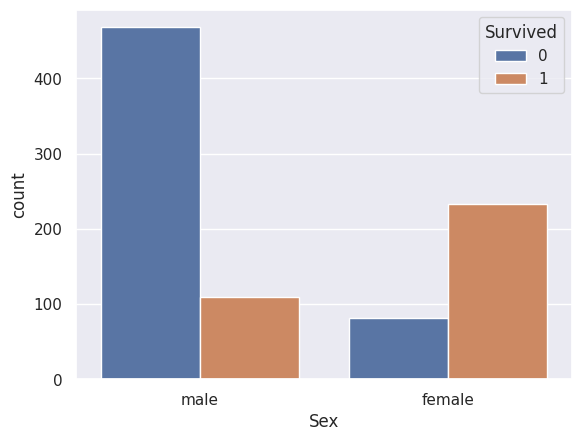

In [105]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=data_copy)

In [109]:
data_copy['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: xlabel='Pclass', ylabel='count'>

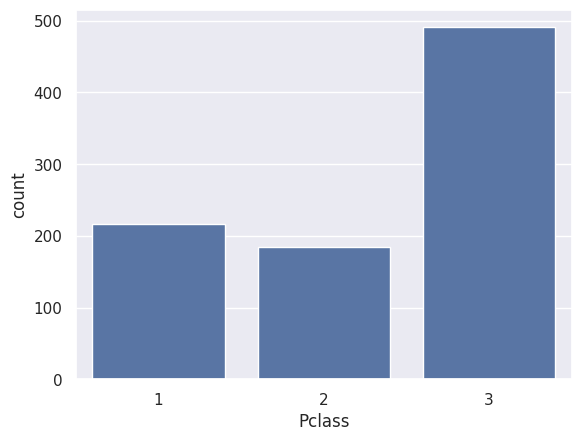

In [108]:
sns.countplot(x='Pclass', data=data_copy)

<Axes: xlabel='Pclass', ylabel='count'>

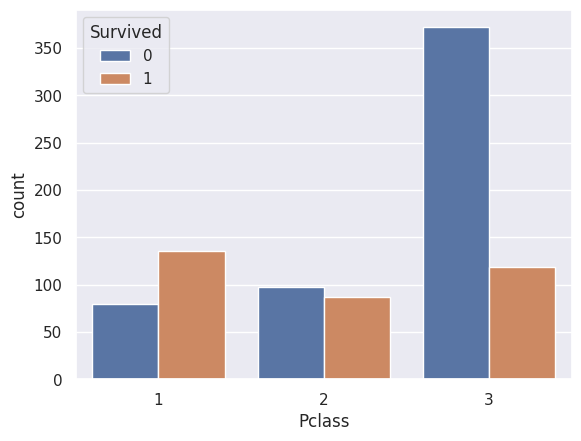

In [111]:
sns.countplot(x='Pclass',hue='Survived',data=data_copy)

Encoding the Categorical Columns

In [112]:
data_copy.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [113]:
data_copy['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [114]:
data_copy['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [124]:
data_copy.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

/tmp/ipython-input-3704770297.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [125]:
data_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Separating features & Target

Corrélation avec Survived :
Survived    1.000000
Sex         0.543351
Fare        0.257307
Embarked    0.106811
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64


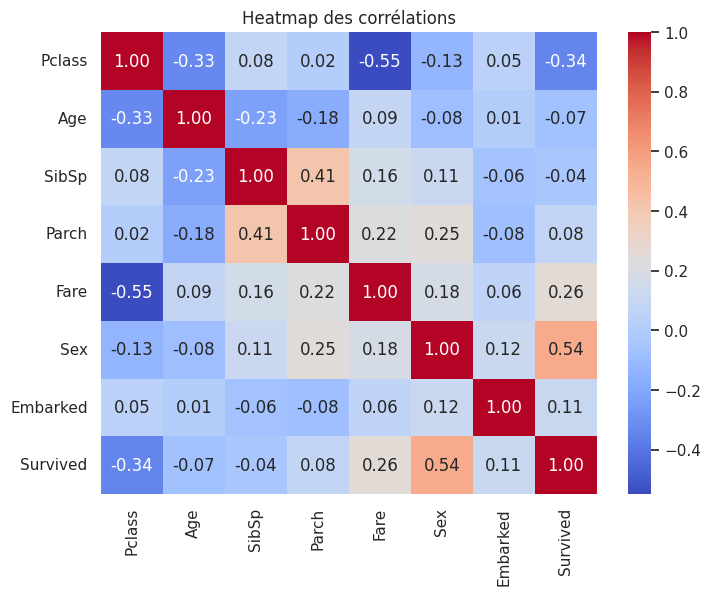

In [127]:
cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'Survived']

# Calculer la corrélation
corr_matrix = data_copy[cols].corr()

# Afficher la corrélation avec Survived
print("Corrélation avec Survived :")
print(corr_matrix['Survived'].sort_values(ascending=False))

# --- Visualiser la corrélation avec un heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap des corrélations")
plt.show()


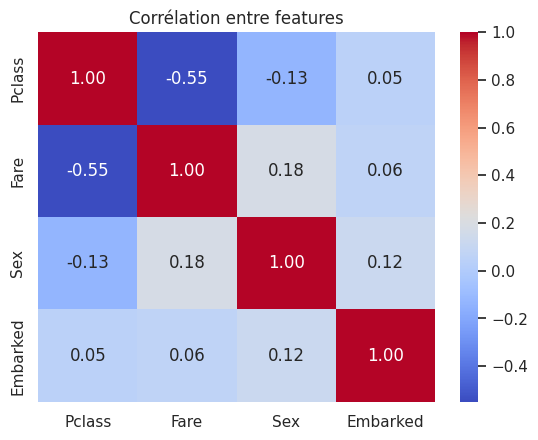

In [132]:
features = ['Pclass','Fare','Sex','Embarked']
sns.heatmap(corr_matrix.loc[features, features], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre features")
plt.show()


In [189]:
Y=data_copy['Survived']
X=data_copy.drop(columns=['PassengerId','Ticket','Name','Age','SibSp','Parch','Fare','Survived'],axis=1)

In [190]:
X.head()

,Pclass,Sex,Embarked
0,3,0,0
1,1,1,1
2,3,1,0
3,1,1,0
4,3,0,0


In [191]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


Splitting the data

In [192]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [193]:
print(X.shape, X_train.shape, X_test.shape)

(891, 3) (712, 3) (179, 3)


Model Training

In [194]:
model= LogisticRegression()

In [195]:
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

In [196]:
X_train_prediction=model.predict(X_train)
print(prediction)

[1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0
 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0]


In [197]:
auc=accuracy_score(Y_train,X_train_prediction)
print(auc)

0.7907303370786517


In [198]:
X_test_prediction=model.predict(X_test)
print(X_test_prediction)

[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


In [199]:
auc=accuracy_score(Y_test,X_test_prediction)
print(auc)

0.7653631284916201


In [200]:
#AUC
train_auc = roc_auc_score(Y_train, model.predict_proba(X_train)[:,1])
test_auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:,1])
print("AUC train :", train_auc)
print("AUC test :", test_auc)

AUC train : 0.8434671047617435
AUC test : 0.8362025316455697


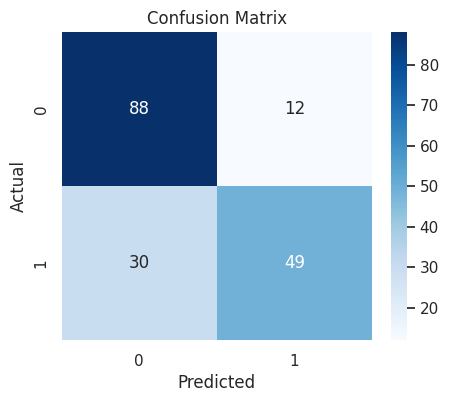

In [204]:
# --- Confusion Matrix ---
cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()